In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

In [2]:
df = pd.read_excel('churn.xlsx')

In [3]:
df.head()

customerID  gender  SeniorCitizen Partner Dependents  tenure PhoneService  \
0  7590-VHVEG  Female              0     Yes         No       1           No   
1  5575-GNVDE    Male              0      No         No      34          Yes   
2  3668-QPYBK    Male              0      No         No       2          Yes   
3  7795-CFOCW    Male              0      No         No      45           No   
4  9237-HQITU  Female              0      No         No       2          Yes   

      MultipleLines InternetService OnlineSecurity  ... DeviceProtection  \
0  No phone service             DSL             No  ...               No   
1                No             DSL            Yes  ...              Yes   
2                No             DSL            Yes  ...               No   
3  No phone service             DSL            Yes  ...              Yes   
4                No     Fiber optic             No  ...               No   

  TechSupport StreamingTV StreamingMovies        Contract PaperlessBilling  \
0          No          No              No  Month-to-month              Yes   
1          No          No              No        One year               No   
2          No          No              No  Month-to-month              Yes   
3         Yes          No              No        One year               No   
4          No          No              No  Month-to-month              Yes   

               PaymentMethod MonthlyCharges  TotalCharges  Churn  
0           Electronic check          29.85         29.85     No  
1               Mailed check          56.95       1889.50     No  
2               Mailed check          53.85        108.15    Yes  
3  Bank transfer (automatic)          42.30       1840.75     No  
4           Electronic check          70.70        151.65    Yes  

[5 rows x 21 columns]

In [4]:
df1 = df.copy()
df2 = df.copy()
df3 = df.copy()
df4 = df.copy()
df5 = df.copy()

In [5]:
df.describe()

SeniorCitizen       tenure  MonthlyCharges  TotalCharges
count    7043.000000  7043.000000     7043.000000   7032.000000
mean        0.162289    32.370865       64.761692   2283.300441
std         0.368742    24.559231       30.090047   2266.771362
min         0.000000     0.000000       18.250000     18.800000
25%         0.000000     9.000000       35.500000    401.450000
50%         0.000000    29.000000       70.350000   1397.475000
75%         0.000000    55.000000       89.850000   3794.737500
max         1.000000    72.000000      118.750000   8684.800000

In [6]:
df.shape

(7043, 21)

In [7]:
df.isnull().sum()

customerID           0
gender               0
SeniorCitizen        0
Partner              0
Dependents           0
tenure               0
PhoneService         0
MultipleLines        0
InternetService      0
OnlineSecurity       0
OnlineBackup         0
DeviceProtection     0
TechSupport          0
StreamingTV          0
StreamingMovies      0
Contract             0
PaperlessBilling     0
PaymentMethod        0
MonthlyCharges       0
TotalCharges        11
Churn                0
dtype: int64

In [8]:
df['Churn'].value_counts()

Churn
No     5174
Yes    1869
Name: count, dtype: int64

In [9]:
1869/(5174+1869)

0.2653698707936959

<Axes: xlabel='Churn', ylabel='count'>

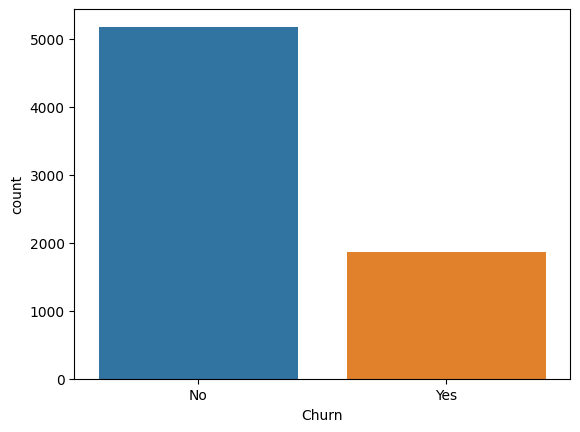

In [10]:
sns.countplot(x='Churn',data=df)

In [11]:
df.dropna(inplace=True)

In [12]:
df.isnull().sum()

customerID          0
gender              0
SeniorCitizen       0
Partner             0
Dependents          0
tenure              0
PhoneService        0
MultipleLines       0
InternetService     0
OnlineSecurity      0
OnlineBackup        0
DeviceProtection    0
TechSupport         0
StreamingTV         0
StreamingMovies     0
Contract            0
PaperlessBilling    0
PaymentMethod       0
MonthlyCharges      0
TotalCharges        0
Churn               0
dtype: int64

In [13]:
df.shape

(7032, 21)

In [14]:
df.corr(numeric_only=True)

SeniorCitizen    tenure  MonthlyCharges  TotalCharges
SeniorCitizen        1.000000  0.015205        0.219556      0.102001
tenure               0.015205  1.000000        0.246852      0.825874
MonthlyCharges       0.219556  0.246852        1.000000      0.651065
TotalCharges         0.102001  0.825874        0.651065      1.000000

<Axes: >

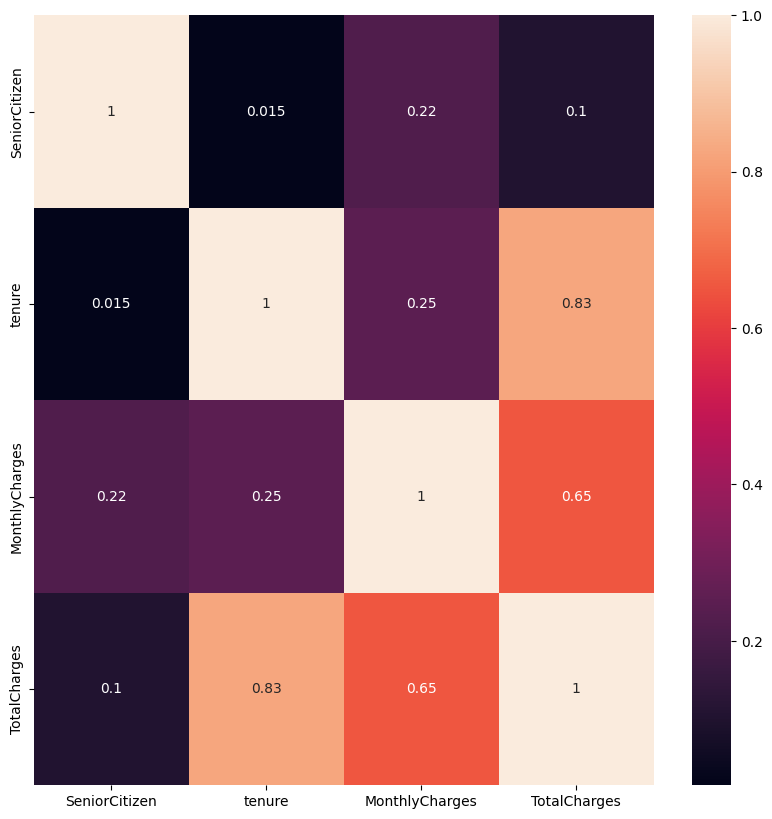

In [15]:
plt.figure(figsize=(10,10))
sns.heatmap(df.corr(numeric_only=True),annot=True)

<Axes: xlabel='gender', ylabel='count'>

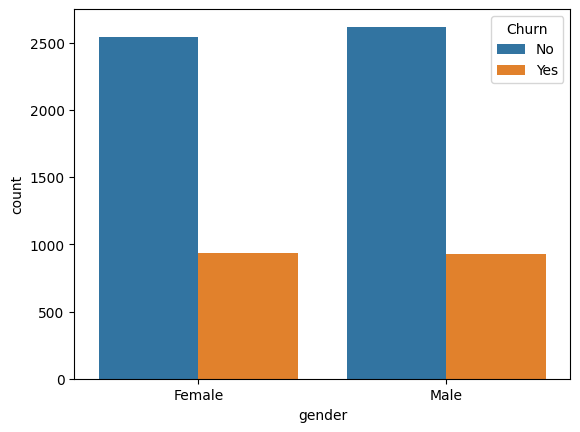

In [16]:
sns.countplot(x='gender',hue='Churn',data=df)

In [17]:
df['PhoneService'].value_counts()

PhoneService
Yes    6352
No      680
Name: count, dtype: int64

# Preprocess the Dataset

In [18]:
df.drop('customerID', axis=1, inplace=True)

In [19]:
df.shape

(7032, 20)

In [20]:
df.head()

gender  SeniorCitizen Partner Dependents  tenure PhoneService  \
0  Female              0     Yes         No       1           No   
1    Male              0      No         No      34          Yes   
2    Male              0      No         No       2          Yes   
3    Male              0      No         No      45           No   
4  Female              0      No         No       2          Yes   

      MultipleLines InternetService OnlineSecurity OnlineBackup  \
0  No phone service             DSL             No          Yes   
1                No             DSL            Yes           No   
2                No             DSL            Yes          Yes   
3  No phone service             DSL            Yes           No   
4                No     Fiber optic             No           No   

  DeviceProtection TechSupport StreamingTV StreamingMovies        Contract  \
0               No          No          No              No  Month-to-month   
1              Yes          No          No              No        One year   
2               No          No          No              No  Month-to-month   
3              Yes         Yes          No              No        One year   
4               No          No          No              No  Month-to-month   

  PaperlessBilling              PaymentMethod  MonthlyCharges  TotalCharges  \
0              Yes           Electronic check           29.85         29.85   
1               No               Mailed check           56.95       1889.50   
2              Yes               Mailed check           53.85        108.15   
3               No  Bank transfer (automatic)           42.30       1840.75   
4              Yes           Electronic check           70.70        151.65   

  Churn  
0    No  
1    No  
2   Yes  
3    No  
4   Yes

In [21]:
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()

In [22]:
df.columns

Index(['gender', 'SeniorCitizen', 'Partner', 'Dependents', 'tenure',
       'PhoneService', 'MultipleLines', 'InternetService', 'OnlineSecurity',
       'OnlineBackup', 'DeviceProtection', 'TechSupport', 'StreamingTV',
       'StreamingMovies', 'Contract', 'PaperlessBilling', 'PaymentMethod',
       'MonthlyCharges', 'TotalCharges', 'Churn'],
      dtype='object')

In [23]:
from pandas.core.dtypes.common import is_numeric_dtype

In [24]:
for col in df.columns:
    if is_numeric_dtype(df[col]):
        continue
    else:
        df[col] = le.fit_transform(df[col])
df.head()

gender  SeniorCitizen  Partner  Dependents  tenure  PhoneService  \
0       0              0        1           0       1             0   
1       1              0        0           0      34             1   
2       1              0        0           0       2             1   
3       1              0        0           0      45             0   
4       0              0        0           0       2             1   

   MultipleLines  InternetService  OnlineSecurity  OnlineBackup  \
0              1                0               0             2   
1              0                0               2             0   
2              0                0               2             2   
3              1                0               2             0   
4              0                1               0             0   

   DeviceProtection  TechSupport  StreamingTV  StreamingMovies  Contract  \
0                 0            0            0                0         0   
1                 2            0            0                0         1   
2                 0            0            0                0         0   
3                 2            2            0                0         1   
4                 0            0            0                0         0   

   PaperlessBilling  PaymentMethod  MonthlyCharges  TotalCharges  Churn  
0                 1              2           29.85         29.85      0  
1                 0              3           56.95       1889.50      0  
2                 1              3           53.85        108.15      1  
3                 0              0           42.30       1840.75      0  
4                 1              2           70.70        151.65      1

In [25]:
x=df.drop('Churn',axis=1)
y = df[['Churn']]

In [26]:
x.head()

gender  SeniorCitizen  Partner  Dependents  tenure  PhoneService  \
0       0              0        1           0       1             0   
1       1              0        0           0      34             1   
2       1              0        0           0       2             1   
3       1              0        0           0      45             0   
4       0              0        0           0       2             1   

   MultipleLines  InternetService  OnlineSecurity  OnlineBackup  \
0              1                0               0             2   
1              0                0               2             0   
2              0                0               2             2   
3              1                0               2             0   
4              0                1               0             0   

   DeviceProtection  TechSupport  StreamingTV  StreamingMovies  Contract  \
0                 0            0            0                0         0   
1                 2            0            0                0         1   
2                 0            0            0                0         0   
3                 2            2            0                0         1   
4                 0            0            0                0         0   

   PaperlessBilling  PaymentMethod  MonthlyCharges  TotalCharges  
0                 1              2           29.85         29.85  
1                 0              3           56.95       1889.50  
2                 1              3           53.85        108.15  
3                 0              0           42.30       1840.75  
4                 1              2           70.70        151.65

In [27]:
y.head()

Churn
0      0
1      0
2      1
3      0
4      1

# Imbalanced Data handle

In [28]:
df.Churn.value_counts()

Churn
0    5163
1    1869
Name: count, dtype: int64

In [29]:
not_churned = (5163/(5163+1869))*100
churned = (1869/(5163+1869))*100

In [30]:
print('Not Churned {} percent of total people'.format(not_churned))
print('Churned {} percent of total people'.format(churned))

Not Churned 73.42150170648463 percent of total people
Churned 26.578498293515356 percent of total people


# Synthetic Minority Oversampling Technique(SMOTE)

In [42]:
!pip install imblearn

In [43]:
from imblearn.combine import SMOTETomek
sm = SMOTETomek(random_state=44)

In [44]:
y.value_counts() #before sampling

Churn
0        5163
1        1869
Name: count, dtype: int64

In [45]:
X,Y = sm.fit_resample(x,y)

In [46]:
Y.value_counts() #after sampling

Churn
0        4785
1        4785
Name: count, dtype: int64

# Near Miss for under sampling

In [47]:
from imblearn.under_sampling import NearMiss
nm = NearMiss()
new_x, new_y = nm.fit_resample(x,y)

In [48]:
new_y.value_counts()

Churn
0        1869
1        1869
Name: count, dtype: int64

# Over Sampling

In [49]:
df2.head()

customerID  gender  SeniorCitizen Partner Dependents  tenure PhoneService  \
0  7590-VHVEG  Female              0     Yes         No       1           No   
1  5575-GNVDE    Male              0      No         No      34          Yes   
2  3668-QPYBK    Male              0      No         No       2          Yes   
3  7795-CFOCW    Male              0      No         No      45           No   
4  9237-HQITU  Female              0      No         No       2          Yes   

      MultipleLines InternetService OnlineSecurity  ... DeviceProtection  \
0  No phone service             DSL             No  ...               No   
1                No             DSL            Yes  ...              Yes   
2                No             DSL            Yes  ...               No   
3  No phone service             DSL            Yes  ...              Yes   
4                No     Fiber optic             No  ...               No   

  TechSupport StreamingTV StreamingMovies        Contract PaperlessBilling  \
0          No          No              No  Month-to-month              Yes   
1          No          No              No        One year               No   
2          No          No              No  Month-to-month              Yes   
3         Yes          No              No        One year               No   
4          No          No              No  Month-to-month              Yes   

               PaymentMethod MonthlyCharges  TotalCharges  Churn  
0           Electronic check          29.85         29.85     No  
1               Mailed check          56.95       1889.50     No  
2               Mailed check          53.85        108.15    Yes  
3  Bank transfer (automatic)          42.30       1840.75     No  
4           Electronic check          70.70        151.65    Yes  

[5 rows x 21 columns]

In [50]:
df2.Churn.value_counts()

Churn
No     5174
Yes    1869
Name: count, dtype: int64

In [53]:
from imblearn.over_sampling import RandomOverSampler
over = RandomOverSampler(random_state=44)

In [54]:
x_new, y_new =over.fit_resample(x,y)

In [55]:
y_new.value_counts()

Churn
0        5163
1        5163
Name: count, dtype: int64

# Hold out cross validation

In [56]:
from sklearn.model_selection import train_test_split as tts

In [57]:
xtrain,xtest, ytrain, ytest = tts(x_new,y_new,random_state=42)

In [58]:
xtrain.to_csv('Delowar.csv')

In [61]:
train, test =tts(df,train_size=0.8,random_state=50)

In [62]:
train.head()

gender  SeniorCitizen  Partner  Dependents  tenure  PhoneService  \
6403       1              0        1           1      72             1   
1677       1              0        1           1       6             1   
2723       1              0        0           0      21             1   
1192       1              0        0           0       7             1   
3638       0              1        1           0       2             1   

      MultipleLines  InternetService  OnlineSecurity  OnlineBackup  \
6403              2                1               2             2   
1677              2                2               1             1   
2723              0                2               1             1   
1192              2                1               0             0   
3638              0                0               0             2   

      DeviceProtection  TechSupport  StreamingTV  StreamingMovies  Contract  \
6403                 2            2            2                2         2   
1677                 1            1            1                1         2   
2723                 1            1            1                1         0   
1192                 2            0            2                0         0   
3638                 0            0            0                0         0   

      PaperlessBilling  PaymentMethod  MonthlyCharges  TotalCharges  Churn  
6403                 1              0          116.60       8337.45      0  
1677                 0              3           25.40        153.30      0  
2723                 0              1           20.50        402.85      0  
1192                 1              2           90.45        593.45      1  
3638                 0              1           50.15        115.10      1

In [63]:
test.head()

gender  SeniorCitizen  Partner  Dependents  tenure  PhoneService  \
4460       1              0        1           0      18             1   
733        0              0        1           1      72             1   
5514       0              0        0           0       1             1   
5864       0              0        1           0      47             1   
916        0              1        0           0      23             1   

      MultipleLines  InternetService  OnlineSecurity  OnlineBackup  \
4460              0                1               0             0   
733               2                1               2             0   
5514              0                0               2             0   
5864              0                2               1             1   
916               0                1               2             0   

      DeviceProtection  TechSupport  StreamingTV  StreamingMovies  Contract  \
4460                 2            2            0                0         0   
733                  0            0            0                0         2   
5514                 0            0            0                0         0   
5864                 1            1            1                1         2   
916                  0            0            0                0         0   

      PaperlessBilling  PaymentMethod  MonthlyCharges  TotalCharges  Churn  
4460                 0              2           78.20       1468.75      0  
733                  0              0           79.05       5730.70      0  
5514                 1              0           48.45         48.45      0  
5864                 0              0           19.65        921.55      0  
916                  1              0           75.40       1643.55      0

In [64]:
from sklearn.tree import DecisionTreeClassifier
dt = DecisionTreeClassifier()

In [65]:
dt.fit(xtrain,ytrain)

DecisionTreeClassifier()

In [66]:
dt.score(xtest,ytest)

0.8667699457784663

# Without Sampling

In [67]:
x.shape


(7032, 19)

In [68]:
xtrain1,xtest1,ytrain1,ytest1 = tts(x,y,test_size=.3,random_state=42)

In [69]:
dt.fit(xtrain1,ytrain1)

DecisionTreeClassifier()

In [70]:
dt.score(xtest1,ytest1)

0.7199052132701422

# If i want to get a perfect machine learning model then i have to Sampling the data

# K Fold Cross Validation

In [71]:
from sklearn.model_selection import KFold, cross_val_score, cross_validate

In [72]:
kfold = KFold(n_splits=4)

In [73]:
result  = cross_val_score(dt,x_new,y_new,cv=kfold)

In [74]:
result

array([0.80751356, 0.79550736, 0.87020535, 0.99612553])

In [75]:
result.mean()

0.8673379483810519

In [76]:
result.max()

0.9961255327392483

In [78]:
result.min()

0.7955073586367157

# Stratified K Fold Cross Validation

In [87]:
from sklearn.model_selection import StratifiedKFold

In [88]:
st = StratifiedKFold(n_splits=4)

In [89]:
score2 = cross_val_score(dt,x_new,y_new,cv=st)

In [90]:
score2

array([0.85592564, 0.85670023, 0.86943045, 0.90236343])

In [91]:
score2.mean()

0.8711049374398084

# Leave one out cross validation

In [92]:
from sklearn.model_selection import LeaveOneOut
le = LeaveOneOut()

In [96]:
result3 = cross_val_score(dt,x_new,y_new,cv=le)

In [97]:
result3.mean()

0.8902769707534379